In [1]:
import torch
import einops
import numpy as np
import matplotlib.pyplot as plt
from Simplex.noise import OpenSimplex
import GaussianDiffusion
from patchify import patchify, unpatchify, batch_patchify

In [2]:
# x = torch.rand(1, 1, 256, 256)
octave=2
persistence=0.8
frequency = 16
num_timesteps = 1000
in_channels = 1
shape = (3, 64, 64)

In [3]:
x = torch.rand(1, in_channels, 256, 256)
t = torch.randint(0, num_timesteps, (x.shape[0],), device=x.device)

In [4]:
noise_fxn = OpenSimplex(seed=100)

In [5]:
noise = noise_fxn.komal_rand_4d_fixed_T_octaves(shape = (1, 64, 64), T = t.numpy(), octaves=6, frequency=64, persistence=0.9)

In [6]:
noise = noise_fxn.symmetric_rand_4d_fixed_T_octaves(shape = (1, 64, 64), T = t.numpy(), octaves=1, frequency=8, persistence=0.9)

In [9]:
noise.shape

(1, 1, 64, 64)

In [8]:
simplexnoise = generate_simplex_4noise(x, t, patch_size=32, octave=8, frequency=128, persistence=0.9, sigma = 2)

NameError: name 'generate_simplex_4noise' is not defined

In [102]:
# simplexnoise.shape

In [103]:
# simplexnoise = GaussianDiffusion.generate_komal_simplex(x, t, patch_size=32, octave=8, frequency=128, persistence=0.9, sigma = 1.2)

In [104]:
# sp = (1, 8, 8, 1, 32, 32)

In [105]:
# sp[1:3]

In [106]:
# noiice = patch_noise(x_test, t, noise_fun = GaussianDiffusion.generate_simplex_4noise, patch_size = 16)

In [110]:
def plot_tensor(array):
#     array = array.numpy()
    array = array.transpose(1, 2, 0)
    plt.imshow(array, cmap = 'gray')
    plt.axis('off')  # Optional: turn off the axis
    plt.show()

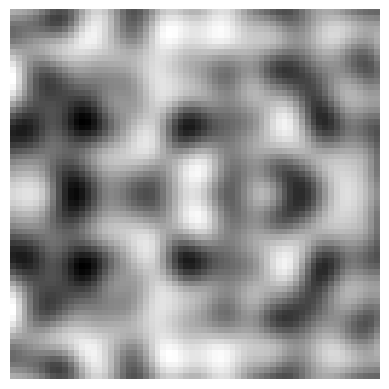

In [113]:
plot_tensor(noise[0])

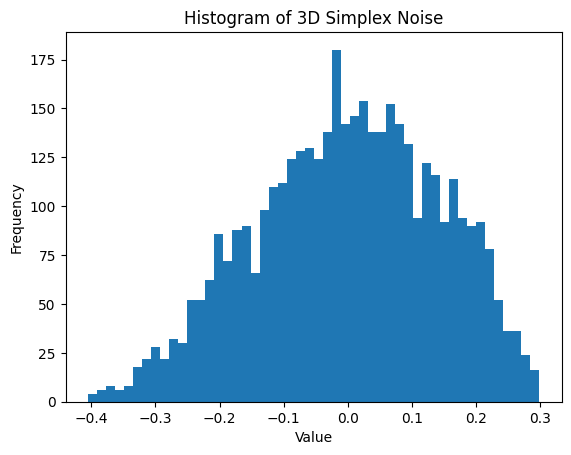

In [114]:
# Generate random noise
noise = noise.flatten()
# .numpy()
# Plot the histogram
plt.hist(noise, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 3D Simplex Noise')
plt.show()

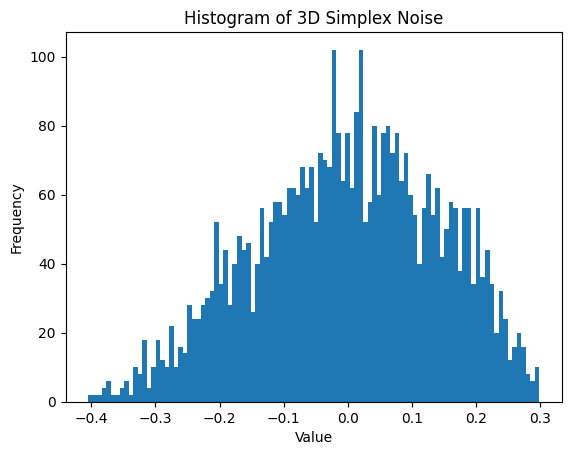

In [115]:
# Generate random noise
# noise = simplexnoise.flatten().numpy()
# Plot the histogram
plt.hist(noise, bins=100)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 3D Simplex Noise')
plt.show()

In [78]:
import numpy as np
from scipy.stats import kurtosis, skew

# x = np.random.normal(0, 1, 100000)   # create random values based on a normal distribution

print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(noise, fisher=False) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(noise) ))

excess kurtosis of normal distribution (should be 0): 2.2479513132536013
skewness of normal distribution (should be 0): -0.0263269703418896


In [67]:
import numpy as np

# Image dimensions
channel, height, width = 3, 64, 64

# Desired average frequency value and standard deviation
delta = 1
sigma = 1  # Adjust this for smoother or sharper distribution

# Create a meshgrid of x and y coordinates
x_coords, y_coords, z_coords = np.meshgrid(np.linspace(-1, 1, width), np.linspace(-1, 1, height), np.linspace(-1, 1, channel))

# Calculate the Gaussian-like position embeddings
position_embeddings = delta * np.exp(-(x_coords**2 + y_coords**2 + z_coords**2) / (2 * sigma**2))

# Display the shape of the position embeddings
print("Position embeddings shape:", position_embeddings.shape)

Position embeddings shape: (64, 64, 3)


In [50]:
position_embeddings.shape

(64, 64, 3)

In [51]:
position_embeddings[0][0][0]

0.22313016014842982

In [38]:
import numpy as np

# Image dimensions
height, width = 64, 64

# Desired average frequency value and standard deviation
delta = 100
sigma = 1.5  # Adjust this for smoother or sharper distribution

# Calculate the center indices
center_x = width / 2
center_y = height / 2

# Create a meshgrid of x and y coordinates
x_coords, y_coords = np.meshgrid(
    np.linspace(0, width - 1, width), np.linspace(0, height - 1, height)
)

# Calculate the Gaussian-like position embeddings
position_embeddings = delta * np.exp(
    -((x_coords - center_x) ** 2 + (y_coords - center_y) ** 2) / (2 * sigma ** 2)
)

# Normalize the position embeddings to have a sum of 1
position_embeddings /= np.sum(position_embeddings)

# Display the shape of the position embeddings
print("Position embeddings shape:", position_embeddings.shape)


Position embeddings shape: (64, 64)


In [17]:
def plot_tensor(array):
#     array = array.numpy()
#     array = array.transpose(1, 2, 0)
    plt.imshow(array, cmap = 'gray')
    plt.axis('off')  # Optional: turn off the axis
    plt.show()

In [118]:
plot_tensor(noise1)

ValueError: axes don't match array

In [120]:
# Generate random noise
noise = noise1.flatten()
# .numpy()
# Plot the histogram
plt.hist(noise, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 3D Simplex Noise')
plt.show()

NameError: name 'noise1' is not defined

In [70]:
z, y, x = [np.arange(-end // 2, end // 2) for end in shape]

In [72]:
x, y, z

(array([-32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20,
        -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,
         -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,
          7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
         20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31]),
 array([-32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20,
        -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,
         -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,
          7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
         20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31]),
 array([-2, -1,  0]))

In [73]:
z, y, x = [np.arange(0, end) for end in shape]

In [74]:
x, y, z

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 array([0, 1, 2]))

In [21]:
z, y, x = [np.arange(0, end) - end // 2 for end in shape] 

In [22]:
x, y, z

(array([-32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20,
        -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,
         -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,
          7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
         20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31]),
 array([-32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20,
        -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,
         -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,
          7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
         20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31]),
 array([-1,  0,  1]))

In [26]:
import numpy as np

def rand_4d_fixed_T_octaves(shape, scale=0.1, octaves=10, persistence=0.8, frequency=2):
    """
    Returns a layered fractal noise in 3D

    :param shape: Shape of 3D tensor output
    :param octaves: Number of levels of fractal noise
    :param persistence: float between (0-1) -> Rate at which amplitude of each level decreases
    :param frequency: Frequency of initial octave of noise
    :return: Fractal noise sample with n lots of 2D images
    """
    assert len(shape) == 3
    noise = np.zeros(shape)
    
    amplitude = 1
    for _ in range(octaves):
        # Generate symmetric noise using normal distribution
        noise4arr = np.random.normal(size=shape)
        
        # Apply the generated noise symmetrically
        for dim in range(3):
            mid = shape[dim] // 2
            indices = [slice(None)] * 3
            indices[dim] = slice(0, mid)
            noise4arr[tuple(indices)] = noise4arr[tuple(indices)][::-1]
        
        noise += amplitude * noise4arr
        frequency /= 2
        amplitude *= persistence
    return noise


In [30]:
noise1 = rand_4d_fixed_T_octaves(shape=(64, 64,3))

In [31]:
noise1.shape

(64, 64, 3)

In [37]:
import numpy as np

class YourNoiseGenerator:
    # ... (your other methods)

    def symmetric_rand_4d_fixed_T_octaves(self, shape, T, scale=0.1, octaves=1, persistence=0.8, frequency=2):
        """
        Returns a layered fractal noise in 3D

        :param shape: Shape of 3D tensor output
        :param T: Time step parameter
        :param octaves: Number of levels of fractal noise
        :param persistence: float between (0-1) -> Rate at which amplitude of each level decreases
        :param frequency: Frequency of initial octave of noise
        :return: Fractal noise sample with n lots of 2D images
        """
        assert len(shape) == 3
        noise = np.zeros(shape)
        z, y, x = [np.arange(0, end) - end // 2 for end in shape]  # Symmetric grid
        
        amplitude = 1
        for _ in range(octaves):
            # Generate simplex-like noise
            noise4arr = self.noise4array(x / frequency, y / frequency, z / frequency, T / frequency)
            noise4arr_symmetric = 0.5 * (noise4arr + noise4arr[::-1, ::-1, ::-1])  # Apply symmetry
            
            noise += amplitude * noise4arr_symmetric
            frequency /= 2
            amplitude *= persistence
        return noise


(100, 2)


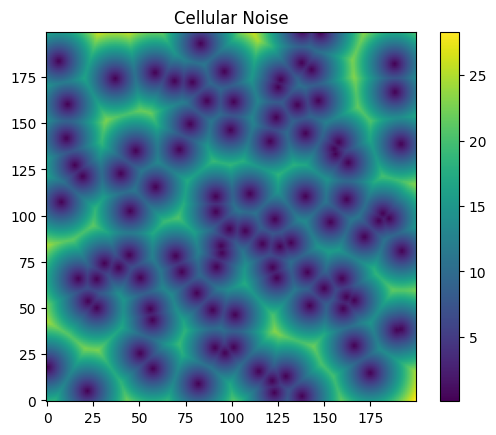

In [124]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def generate_cellular_noise(shape, num_points):
    noise = np.zeros(shape)
    points = np.random.rand(num_points, 2) * np.array([shape[0], shape[1]])
    print(points.shape)
    for y in range(shape[0]):
        for x in range(shape[1]):
            min_distance = float('inf')
            for point in points:
                distance = euclidean_distance(np.array([y, x]), point)
                min_distance = min(min_distance, distance)
            noise[y, x] = min_distance
    
    return noise

# Set the shape and number of points
shape = (200, 200)  # Dimensions of the noise grid
num_points = 100    # Number of seed points

# Generate cellular noise
cellular_noise = generate_cellular_noise(shape, num_points)

# Display the noise
plt.imshow(cellular_noise, cmap='viridis', origin='lower')
plt.colorbar()
plt.title("Cellular Noise")
plt.show()

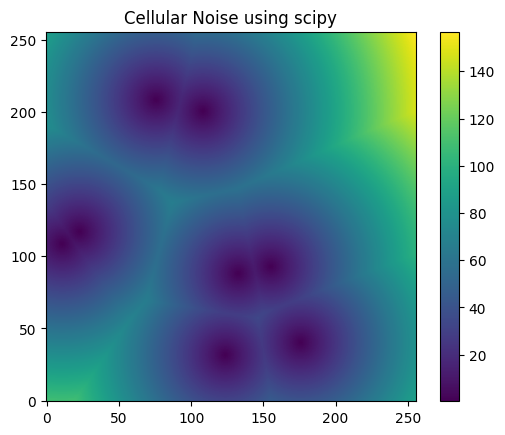

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi

def generate_cellular_noise(shape, num_points):
    points = np.random.rand(num_points, 2) * np.array([shape[0], shape[1]])
    vor = Voronoi(points)
    
    noise = np.zeros(shape)
    for y in range(shape[0]):
        for x in range(shape[1]):
            min_distance = float('inf')
            for region_index in vor.point_region:
                region = vor.regions[region_index]
                if -1 in region:
                    continue
                vertex = vor.vertices[region[0]]
                distance = np.sqrt((x - vertex[0])**2 + (y - vertex[1])**2)
                min_distance = min(min_distance, distance)
            noise[y, x] = min_distance
    
    return noise

# Set the shape and number of points
shape = (256, 256)  # Dimensions of the noise grid
num_points = 20     # Number of seed points

# Generate cellular noise using scipy
cellular_noise = generate_cellular_noise(shape, num_points)

# Display the noise
plt.imshow(cellular_noise, cmap='viridis', origin='lower')
plt.colorbar()
plt.title("Cellular Noise using scipy")
plt.show()


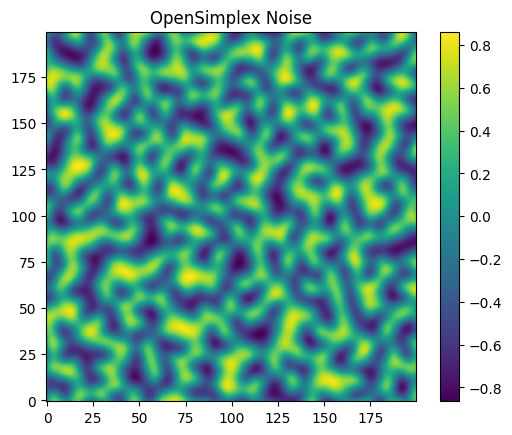

In [164]:
import numpy as np
from opensimplex import OpenSimplex
import matplotlib.pyplot as plt
noise_gen = OpenSimplex(seed = 100)
def generate_open_simplex_noise(shape, scale=0.1):
    noise = np.zeros(shape)
    
    
    for y in range(shape[0]):
        for x in range(shape[1]):
            noise[y, x] = noise_gen.noise2(x * scale, y * scale)
    
    return noise

# Set the shape of the noise grid
shape = (200, 200)  # Dimensions of the noise grid

# Generate OpenSimplex noise
open_simplex_noise = generate_open_simplex_noise(shape)

# Display the noise
plt.imshow(open_simplex_noise, cmap='viridis', origin='lower')
plt.colorbar()
plt.title("OpenSimplex Noise")
plt.show()


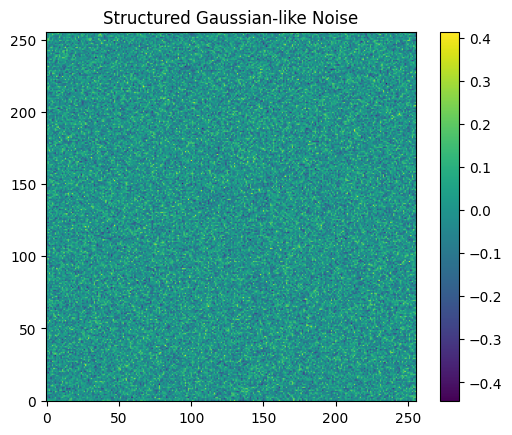

In [782]:
import numpy as np
import matplotlib.pyplot as plt

class YourNoiseGenerator:
    # ... (your other methods)

    def rand_4d_fixed_T_octaves(self, shape, scale=0.1, octaves=1, persistence=0.8, frequency=1):
        """
        Returns a layered fractal noise in 3D

        :param shape: Shape of 3D tensor output
        :param octaves: Number of levels of fractal noise
        :param persistence: float between (0-1) -> Rate at which amplitude of each level decreases
        :param frequency: Frequency of initial octave of noise
        :return: Fractal noise sample with n lots of 2D images
        """
        assert len(shape) == 3
        noise = np.zeros(shape)        
        amplitude = 1
        for _ in range(octaves):
            # Generate Gaussian-like noise using normal distribution
            noise4arr = np.random.normal(scale=scale*frequency, size=shape)
            
            noise += amplitude * noise4arr
            frequency /= 2
            amplitude *= persistence
        return noise

# Example usage
shape = (1, 256, 256)  # Dimensions of the noise grid
noise_gen = YourNoiseGenerator()
noise = noise_gen.rand_4d_fixed_T_octaves(shape)

# Display the noise
plt.imshow(noise[0], cmap='viridis', origin='lower')
plt.colorbar()
plt.title("Structured Gaussian-like Noise")
plt.show()


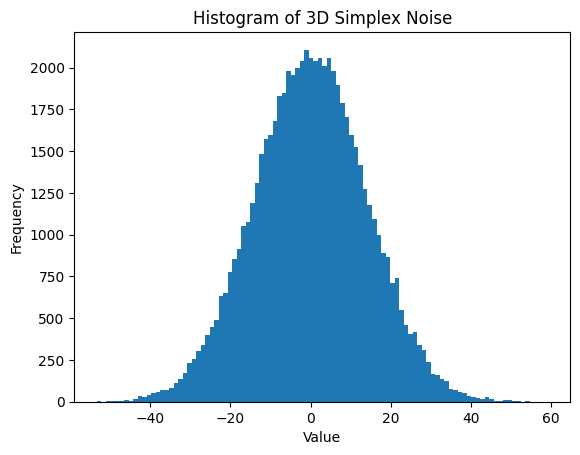

In [777]:
noise = noise.flatten()
# .numpy()
# Plot the histogram
plt.hist(noise, bins=100)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 3D Simplex Noise')
plt.show()

In [778]:
import numpy as np
from scipy.stats import kurtosis, skew

# x = np.random.normal(0, 1, 100000)   # create random values based on a normal distribution

print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(noise, fisher=False) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(noise) ))


excess kurtosis of normal distribution (should be 0): 2.9833571937395984
skewness of normal distribution (should be 0): 0.0011634034712155014


In [839]:
import numpy as np
import matplotlib.pyplot as plt
from Simplex.noise import OpenSimplex
class YourNoiseGenerator(OpenSimplex):
    # ... (your other methods)

    def rand_4d_fixed_T_octaves(self, shape, T, scale=8, octaves=8, persistence=0.9, frequency=32):
        """
        Returns a layered fractal noise in 3D

        :param shape: Shape of 3D tensor output
        :param T: Time step parameter
        :param octaves: Number of levels of fractal noise
        :param persistence: float between (0-1) -> Rate at which amplitude of each level decreases
        :param frequency: Frequency of initial octave of noise
        :return: Fractal noise sample with n lots of 2D images
        """
        assert len(shape) == 3
        noise = np.zeros((1, *shape))
        z, y, x = [np.arange(0, end) for end in shape]  # Symmetric grid
        
        amplitude = 1
        for _ in range(octaves):

            noise4arr = self.noise4array(x / frequency, y / frequency, z / frequency, T / frequency)
            noise += amplitude * noise4arr
            
            frequency /= 2
            amplitude *= persistence

        return noise


shape = (2,256, 256, 256)  # Dimensions of the noise grid
T = torch.randint(0, num_timesteps, (1,)).numpy()  # Time step parameter
noise_gen = YourNoiseGenerator(seed=10)
# noise = noise_gen.rand_4d_fixed_T_octaves(shape, T)


In [840]:
T, z, y, x = [np.arange(0, end) for end in shape]

In [848]:
T

array([0, 1])

In [841]:
noise4arr = noise_gen.noise4array(x / frequency, y / frequency, z / frequency, T / frequency)

In [842]:
noise4arr.shape

(2, 256, 256, 256)

In [843]:
noise[0].max()

2.3448544113018093

In [844]:
noise[0].min()

-2.33456403325464

TypeError: Invalid shape (256, 256, 256) for image data

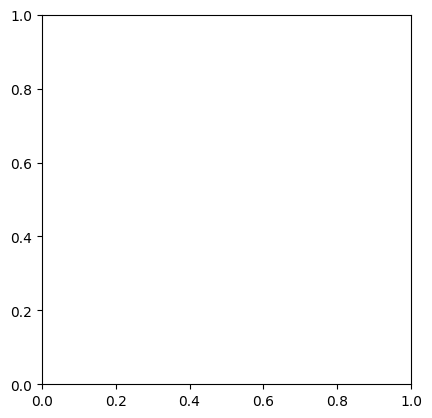

In [845]:
plot_tensor(noise[0])

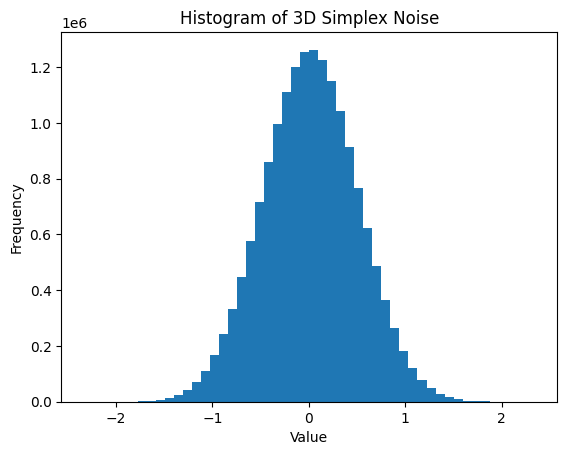

In [846]:
noise = noise.flatten()
# .numpy()
# Plot the histogram
plt.hist(noise, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 3D Simplex Noise')
plt.show()

In [847]:
import numpy as np
from scipy.stats import kurtosis, skew

# x = np.random.normal(0, 1, 100000)   # create random values based on a normal distribution

print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(noise, fisher=False) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(noise) ))


excess kurtosis of normal distribution (should be 0): 2.9260955957083157
skewness of normal distribution (should be 0): -0.01595789664170012


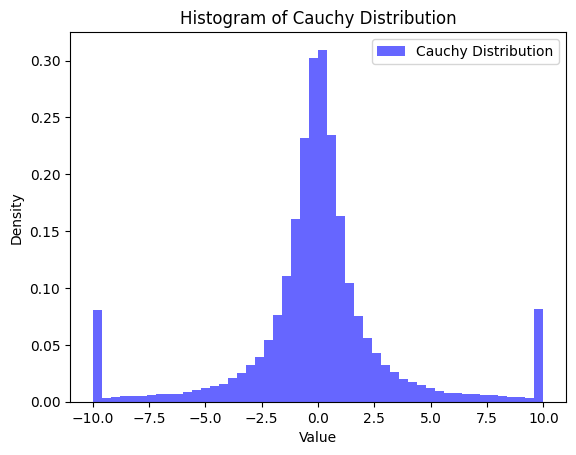

In [867]:
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the data
data_size = (1, 256, 256)

# Create a Cauchy distribution
# You can adjust the location (loc) and scale (scale) parameters to control the distribution
loc = 0  # Location parameter
scale = 1  # Scale parameter
data = np.random.standard_cauchy(data_size) * scale + loc

# Clip extreme values for visualization (optional)
data = np.clip(data, -10, 10)

# Create a histogram to visualize the Cauchy distribution
plt.hist(data.flatten(), bins=50, density=True, alpha=0.6, color='blue', label='Cauchy Distribution')
plt.title('Histogram of Cauchy Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [869]:
import numpy as np
from scipy.stats import kurtosis, skew

# x = np.random.normal(0, 1, 100000)   # create random values based on a normal distribution

print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(data.flatten(), fisher=False) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(data.flatten()) ))


excess kurtosis of normal distribution (should be 0): 6.123836270366756
skewness of normal distribution (should be 0): -0.0007683248800269192


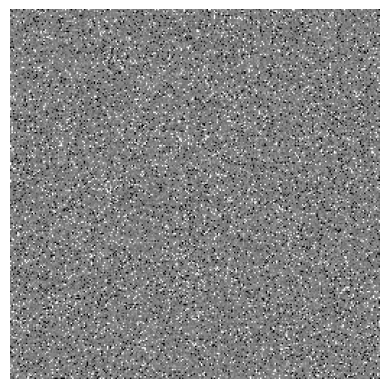

In [853]:
plot_tensor(data)

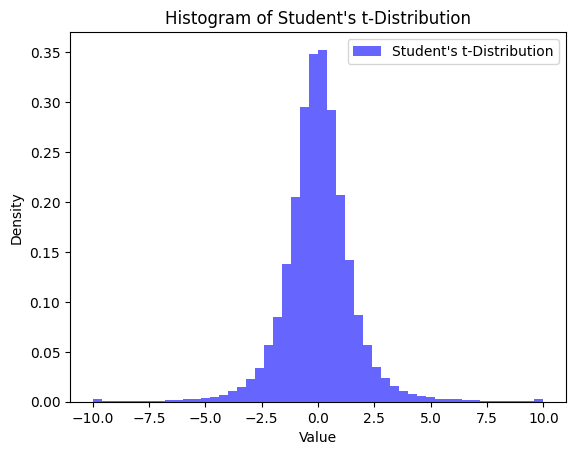

In [880]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Define the size of the data
data_size = (1, 256, 256)

# Define the degrees of freedom parameter (controls tail heaviness)
degrees_of_freedom = 3  # Adjust this parameter as needed

# Create a Student's t-distribution
data = t.rvs(degrees_of_freedom, size=data_size)

# Clip extreme values for visualization (optional)
data = np.clip(data, -10, 10)

# Create a histogram to visualize the Student's t-distribution
plt.hist(data.flatten(), bins=50, density=True, alpha=0.6, color='blue', label="Student's t-Distribution")
plt.title("Histogram of Student's t-Distribution")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [881]:
import numpy as np
from scipy.stats import kurtosis, skew

# x = np.random.normal(0, 1, 100000)   # create random values based on a normal distribution

print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(data.flatten(), fisher=False) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(data.flatten()) ))


excess kurtosis of normal distribution (should be 0): 9.789609309688087
skewness of normal distribution (should be 0): -0.007507512716790298


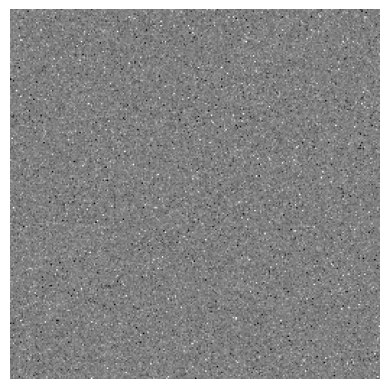

In [882]:
plot_tensor(data)

In [884]:
import noise
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the noise grid
shape = (256, 256)

# Generate 2D Perlin noise
world = np.zeros(shape)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale,
                                     j/scale,
                                     octaves=octaves,
                                     persistence=persistence,
                                     lacunarity=lacunarity,
                                     repeatx=1024,
                                     repeaty=1024,
                                     base=42)

# Visualize the noise
plt.imshow(world, cmap='viridis')
plt.colorbar()
plt.show()


ModuleNotFoundError: No module named 'noise'